In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/Colab Notebooks/Journal_2/dbscan

/content/gdrive/MyDrive/Colab Notebooks/Journal_2/dbscan


In [ ]:
dataset = pd.read_csv("dbscan(without_anomaly).csv")

In [ ]:
features = dataset.drop('class', axis = 1)
target = dataset['class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
def confusion_matrix_func(y_test, y_pred):
  cm = confusion_matrix(y_test,y_pred)
  TP = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1 = 2 * ((precision * recall)/ (precision + recall))
  print('precision: ' + "{}".format(precision))
  print('recall: '+ '{}'.format(recall))
  print('f1: '+ '{}'.format(f1))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

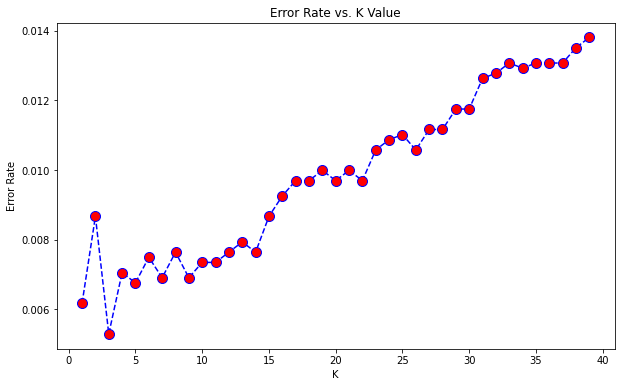

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.pred = knn.predict(X_test)
print(accuracy_score(y_test,knn.pred))
confusion_matrix_func(y_test, knn.pred)

0.9983842538190364
precision: 0.9990680335507922
recall: 0.9975186104218362
f1: 0.9982927207822444


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(probability = True, random_state = 42)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(accuracy_score(y_test,svc_pred))
confusion_matrix_func(y_test,svc_pred)

0.9942714453584018
precision: 0.9953401677539608
recall: 0.9925650557620818
f1: 0.9939506747324336


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.pred = nb.predict(X_test)
print(accuracy_score(y_test, nb.pred))
confusion_matrix_func(y_test, nb.pred)

0.9046709753231492
precision: 0.8878533706119913
recall: 0.9084551811824539
f1: 0.8980361351139042


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.pred = lr.predict(X_test)
print(accuracy_score(y_test, lr.pred))
confusion_matrix_func(y_test, lr.pred)

0.9770857814336075
precision: 0.9711090400745573
recall: 0.980244590780809
f1: 0.9756554307116105


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_train,y_train)
abc.pred = abc.predict(X_test)
print(accuracy_score(y_test, abc.pred))
confusion_matrix_func(y_test, abc.pred)

0.9980904817861339
precision: 0.9965827896862379
recall: 0.9993769470404984
f1: 0.9979779125836055
